<a href="https://colab.research.google.com/github/topkek777/SkillFactory/blob/master/energy_hope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Надежда Энергетики


### Необходимые библиотеки

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Формируем идеальные данные

In [50]:
#Дано:

V = 0.1
dt = 0.1
l = 0.2
h = 0.3
R = 0.1
t = 20
n = int(t / dt)

На какое количество точек разбилась траектория:

In [51]:
n

200

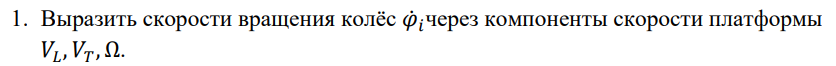

In [52]:
def get_omega(df, l, h, R):  # Нахождение угловых скоростей колёс по заданным скоростям платформы
  df['omega_1'] = (df['vL'] + df['vT'] + (h - l) * df['dpsi']) / R
  df['omega_2'] = (df['vL'] - df['vT'] - (h - l) * df['dpsi']) / R
  df['omega_3'] = (df['vL'] + df['vT'] - (h + l) * df['dpsi']) / R
  df['omega_4'] = (df['vL'] - df['vT'] + (h + l) * df['dpsi']) / R
  return df

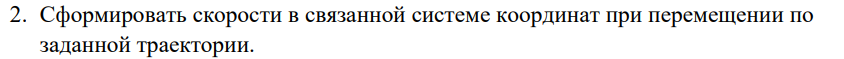


In [53]:
vL_1, vT_1 = V, 0.0
vL_2, vT_2 = V * np.sin(60 * np.pi * 2 / 360), -V * np.cos(60 * np.pi * 2 / 360)
vL_3, vT_3 = -V * np.sin(60 * np.pi * 2 / 360), -V * np.cos(60 * np.pi * 2 / 360)
vL_4, vT_4 = -V, 0.0
vL_5, vT_5 = 0.0, V
V_o = [[vL_1, vT_1], [vL_2, vT_2], [vL_3, vT_3], [vL_4, vT_4], [vL_5, vT_5]]
V_o

[[0.1, 0.0],
 [0.08660254037844387, -0.05000000000000002],
 [-0.08660254037844387, -0.05000000000000002],
 [-0.1, 0.0],
 [0.0, 0.1]]

Сформируем идеальные данные

In [54]:
def get_t(n, dt):
  t_temp = 0
  t_list = []
  for _ in range(n):
    t_list.append(t_temp)
    t_temp += dt
  return t_list

In [55]:
n_on_line = int(n / len(V_o))
data_ideal = np.array([vx_vy*n_on_line for vx_vy in V_o]).flatten().reshape(n, 2)
arr_ideal = pd.DataFrame(data_ideal, columns=['vL', 'vT'])
arr_ideal['t'] = get_t(n, dt)
arr_ideal.loc[n] = [0, 0, t]
arr_ideal['dpsi'] = [0]*(n+1)
arr_ideal = arr_ideal.reindex(columns=['t', 'vL', 'vT', 'dpsi'])
arr_ideal

,t,vL,vT,dpsi
0,0.0,0.1,0.0,0
1,0.1,0.1,0.0,0
2,0.2,0.1,0.0,0
3,0.3,0.1,0.0,0
4,0.4,0.1,0.0,0
...,...,...,...,...
196,19.6,0.0,0.1,0
197,19.7,0.0,0.1,0
198,19.8,0.0,0.1,0
199,19.9,0.0,0.1,0


In [56]:
def integral(V, dt):  # нахождение координат по скоростям
  Integral_V=[]
  sum=0
  for v in V:
    Integral_V.append(sum)
    sum+=v*dt
  return np.array(Integral_V)

In [57]:
arr_ideal['X'] = integral(arr_ideal['vL'], dt)
arr_ideal['Y'] = integral(arr_ideal['vT'], dt)
arr_ideal['psi'] = integral(arr_ideal['dpsi'], dt)
arr_ideal

,t,vL,vT,dpsi,X,Y,psi
0,0.0,0.1,0.0,0,0.000000e+00,0.000000e+00,0.0
1,0.1,0.1,0.0,0,1.000000e-02,0.000000e+00,0.0
2,0.2,0.1,0.0,0,2.000000e-02,0.000000e+00,0.0
3,0.3,0.1,0.0,0,3.000000e-02,0.000000e+00,0.0
4,0.4,0.1,0.0,0,4.000000e-02,0.000000e+00,0.0
...,...,...,...,...,...,...,...
196,19.6,0.0,0.1,0,4.857226e-17,-4.000000e-02,0.0
197,19.7,0.0,0.1,0,4.857226e-17,-3.000000e-02,0.0
198,19.8,0.0,0.1,0,4.857226e-17,-2.000000e-02,0.0
199,19.9,0.0,0.1,0,4.857226e-17,-1.000000e-02,0.0


Функция для построения графиков координат

In [58]:
def plot_x_y_psi(df, x_y_max_padding=0.1, om_max_padding=0.001):
  fig, ax = plt.subplots(nrows=3)
  ax1, ax2, ax3 = ax.flatten()

  ax1.plot(df['t'], df['X'])
  ax1.set_title("X")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("X, m", fontsize=12)
  ax1.set_yticks([0, min(df['X']), max(df['X'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+x_y_max_padding)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['Y'])
  ax2.set_title("Y")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Y, m", fontsize=12)
  ax2.set_yticks([0, min(df['Y']), max(df['Y'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+x_y_max_padding)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['psi'])
  ax3.set_title("Psi")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Psi, rad", fontsize=12)
  ax3.set_yticks([0, min(df['psi']), max(df['psi'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+om_max_padding)
  ax3.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

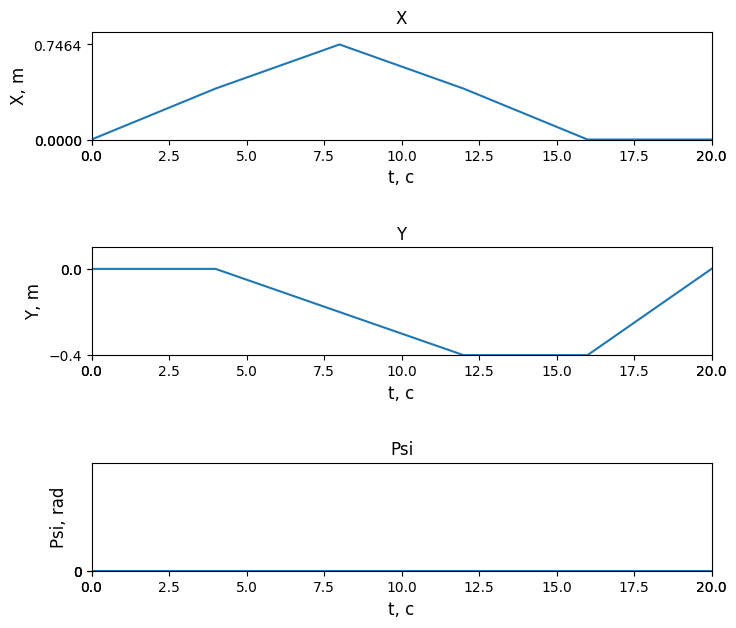

In [59]:
plot_x_y_psi(arr_ideal, x_y_max_padding=0.1, om_max_padding=0.01)

Восcтановление траектории по скоростям

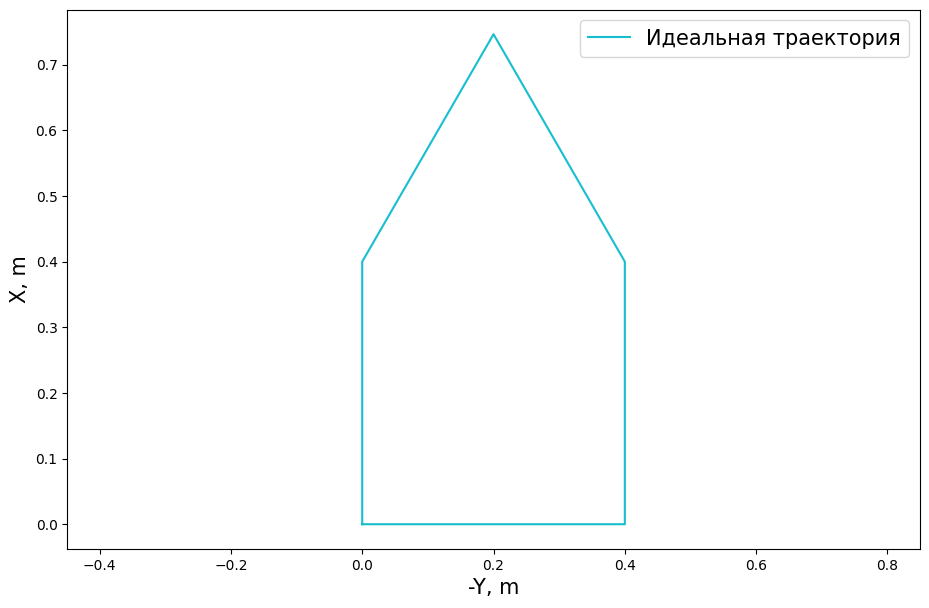

In [92]:
plt.figure(figsize=(11, 7))
plt.plot(-arr_ideal['Y'], arr_ideal['X'], label="Идеальная траектория", color="tab:cyan")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

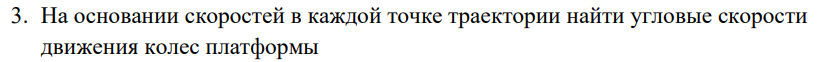

Функция для построения графиков omega

In [61]:
def plot_om(df, max_padding=0.2):
  fig, ax = plt.subplots(nrows=4)
  ax1, ax2, ax3, ax4 = ax.flatten()

  ax1.plot(df['t'], df['omega_1'])
  ax1.set_title("Omega_1")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("Om, 1/c", fontsize=12)
  ax1.set_yticks([0, min(df['omega_1']), max(df['omega_1'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+max_padding)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['omega_2'])
  ax2.set_title("Omega_2")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Om, 1/c", fontsize=12)
  ax2.set_yticks([0, min(df['omega_2']), max(df['omega_2'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+max_padding)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['omega_3'])
  ax3.set_title("Omega_3")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Om, 1/c", fontsize=12)
  ax3.set_yticks([0, min(df['omega_3']), max(df['omega_3'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+max_padding)
  ax3.set_xlim(min(df['t']), max(df['t']))

  ax4.plot(df['t'], df['omega_4'])
  ax4.set_title("Omega_4")
  ax4.set_xlabel("t, c", fontsize=12)
  ax4.set_ylabel("Om, 1/c", fontsize=12)
  ax4.set_yticks([0, min(df['omega_4']), max(df['omega_4'])])
  ax4.set_xticks(list(ax4.get_xticks()) + [min(df['t']), max(df['t'])])
  ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+max_padding)
  ax4.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

In [62]:
arr_ideal = get_omega(arr_ideal, l, h, R)
arr_ideal

,t,vL,vT,dpsi,X,Y,psi,omega_1,omega_2,omega_3,omega_4
0,0.0,0.1,0.0,0,0.000000e+00,0.000000e+00,0.0,1.0,1.0,1.0,1.0
1,0.1,0.1,0.0,0,1.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
2,0.2,0.1,0.0,0,2.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
3,0.3,0.1,0.0,0,3.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
4,0.4,0.1,0.0,0,4.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
196,19.6,0.0,0.1,0,4.857226e-17,-4.000000e-02,0.0,1.0,-1.0,1.0,-1.0
197,19.7,0.0,0.1,0,4.857226e-17,-3.000000e-02,0.0,1.0,-1.0,1.0,-1.0
198,19.8,0.0,0.1,0,4.857226e-17,-2.000000e-02,0.0,1.0,-1.0,1.0,-1.0
199,19.9,0.0,0.1,0,4.857226e-17,-1.000000e-02,0.0,1.0,-1.0,1.0,-1.0


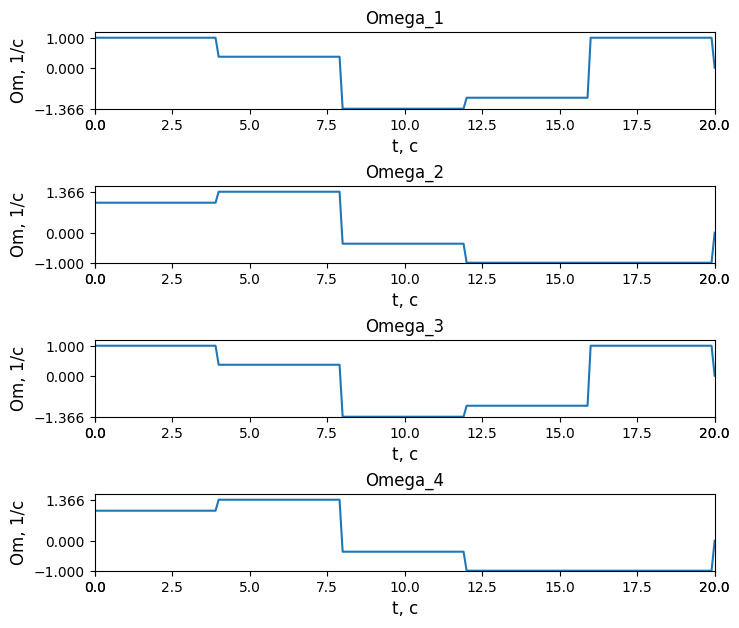

In [63]:
plot_om(arr_ideal, max_padding=0.2)

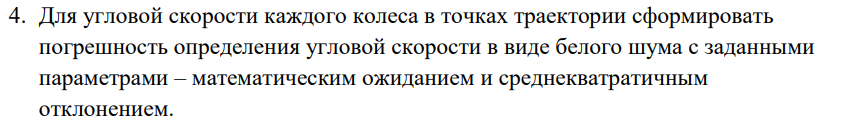

In [64]:
np.random.seed(42)

math_e_1, sko_1 = 0.01*R, 0.05*abs(V)
math_e_2, sko_2 = 0.03*R, 0.05*abs(V)
math_e_3, sko_3 = 0.02*R, 0.05*abs(V)
math_e_4, sko_4 = 0.04*R, 0.05*abs(V)

noise_1 = np.random.normal(math_e_1, sko_1, n+1)
noise_2 = np.random.normal(math_e_2, sko_2, n+1)
noise_3 = np.random.normal(math_e_3, sko_3, n+1)
noise_4 = np.random.normal(math_e_4, sko_4, n+1)

arr_real = arr_ideal[['t']].copy()
arr_real['omega_1'] = arr_ideal['omega_1'] + noise_1
arr_real['omega_2'] = arr_ideal['omega_2'] + noise_2
arr_real['omega_3'] = arr_ideal['omega_3'] + noise_3
arr_real['omega_4'] = arr_ideal['omega_4'] + noise_4
arr_real

,t,omega_1,omega_2,omega_3,omega_4
0,0.0,1.003484,1.005804,1.002026,1.010778
1,0.1,1.000309,1.008415,1.002235,1.006067
2,0.2,1.004238,1.008269,0.999750,1.013384
3,0.3,1.008615,0.996112,1.005114,1.000131
4,0.4,0.999829,0.998311,0.996662,0.997777
...,...,...,...,...,...
196,19.6,0.996581,-0.990231,0.999779,-0.995851
197,19.7,1.001769,-0.997573,1.003887,-0.991309
198,19.8,1.001291,-0.990811,1.005785,-0.998580
199,19.9,0.995285,-1.004972,0.997389,-0.995519


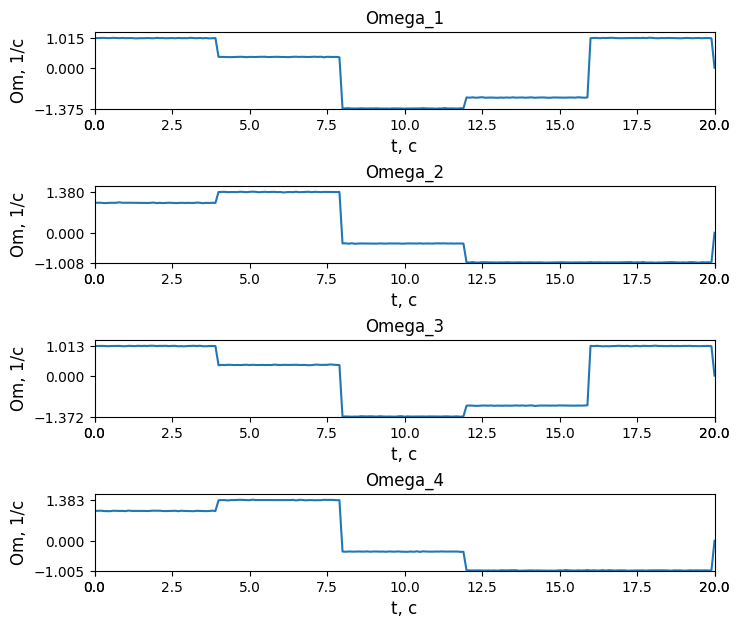

In [65]:
plot_om(arr_real, max_padding=0.2)

Найдём скорости по omega

In [66]:
def get_vx_vy_dpsi(df, l, h, R):
  df['dpsi'] = R*(df['omega_1'] - df['omega_2'] - df['omega_3'] + df['omega_4'])/(4*h)
  df['vL'] = R*(df['omega_1'] + df['omega_2'] + df['omega_3'] + df['omega_4'])/4
  df['vT'] = R*(df['omega_1'] - df['omega_2'] + df['omega_3'] - df['omega_4'])/4 + df['dpsi']*l
  return df

In [67]:
arr_real = get_vx_vy_dpsi(arr_real, l, h, R)
arr_real

,t,omega_1,omega_2,omega_3,omega_4,dpsi,vL,vT
0,0.0,1.003484,1.005804,1.002026,1.010778,0.000536,0.100552,-0.000170
1,0.1,1.000309,1.008415,1.002235,1.006067,-0.000356,0.100426,-0.000370
2,0.2,1.004238,1.008269,0.999750,1.013384,0.000800,0.100641,-0.000282
3,0.3,1.008615,0.996112,1.005114,1.000131,0.000627,0.100249,0.000563
4,0.4,0.999829,0.998311,0.996662,0.997777,0.000219,0.099814,0.000054
...,...,...,...,...,...,...,...,...
196,19.6,0.996581,-0.990231,0.999779,-0.995851,-0.000735,0.000257,0.099414
197,19.7,1.001769,-0.997573,1.003887,-0.991309,0.000346,0.000419,0.099933
198,19.8,1.001291,-0.990811,1.005785,-0.998580,-0.001022,0.000442,0.099707
199,19.9,0.995285,-1.004972,0.997389,-0.995519,0.000612,-0.000195,0.099952


Найдём координаты

In [68]:
arr_real['X'] = integral(arr_real['vL'], dt)
arr_real['Y'] = integral(arr_real['vT'], dt)
arr_real['psi'] = integral(arr_real['dpsi'], dt)
arr_real

,t,omega_1,omega_2,omega_3,omega_4,dpsi,vL,vT,X,Y,psi
0,0.0,1.003484,1.005804,1.002026,1.010778,0.000536,0.100552,-0.000170,0.000000,0.000000,0.000000
1,0.1,1.000309,1.008415,1.002235,1.006067,-0.000356,0.100426,-0.000370,0.010055,-0.000017,0.000054
2,0.2,1.004238,1.008269,0.999750,1.013384,0.000800,0.100641,-0.000282,0.020098,-0.000054,0.000018
3,0.3,1.008615,0.996112,1.005114,1.000131,0.000627,0.100249,0.000563,0.030162,-0.000082,0.000098
4,0.4,0.999829,0.998311,0.996662,0.997777,0.000219,0.099814,0.000054,0.040187,-0.000026,0.000161
...,...,...,...,...,...,...,...,...,...,...,...
196,19.6,0.996581,-0.990231,0.999779,-0.995851,-0.000735,0.000257,0.099414,0.004827,-0.042457,-0.000198
197,19.7,1.001769,-0.997573,1.003887,-0.991309,0.000346,0.000419,0.099933,0.004853,-0.032516,-0.000271
198,19.8,1.001291,-0.990811,1.005785,-0.998580,-0.001022,0.000442,0.099707,0.004895,-0.022523,-0.000237
199,19.9,0.995285,-1.004972,0.997389,-0.995519,0.000612,-0.000195,0.099952,0.004939,-0.012552,-0.000339


Графики координат

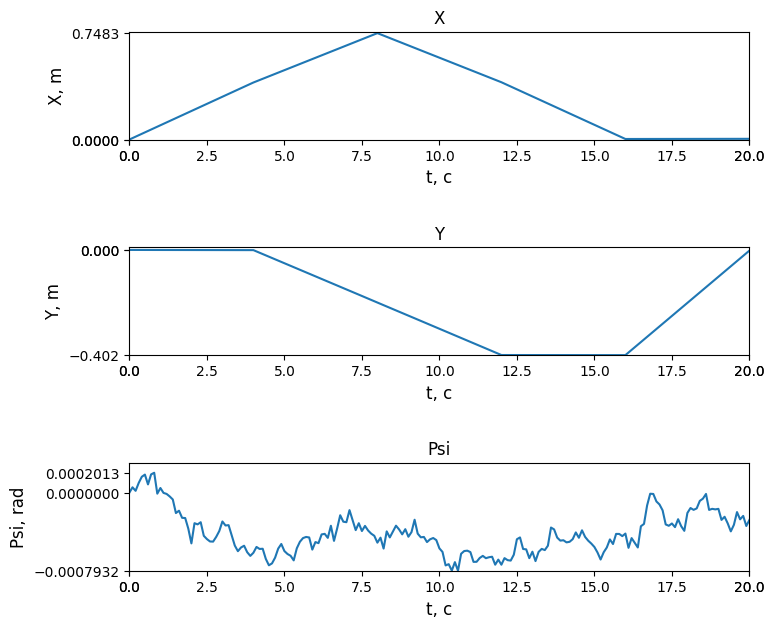

In [69]:
plot_x_y_psi(arr_real, x_y_max_padding=0.01, om_max_padding=0.0001)

Востановим траекторию по скоростям

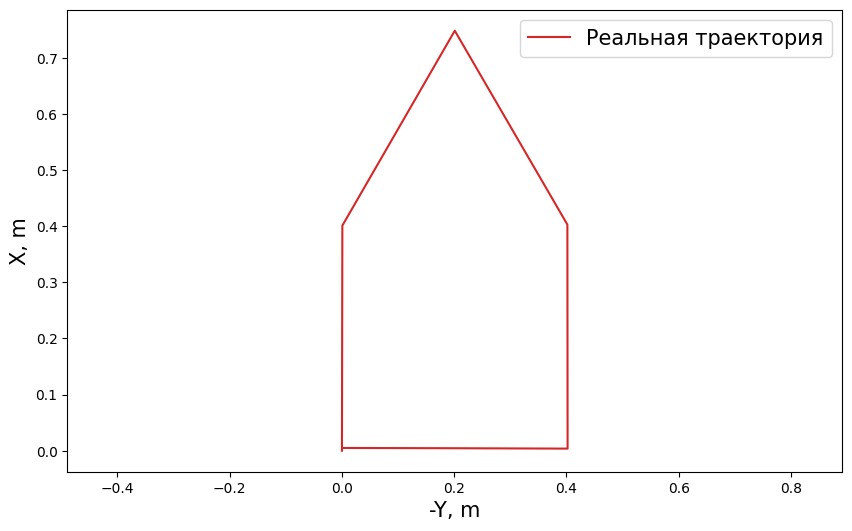

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(-arr_real['Y'], arr_real['X'], label="Реальная траектория", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

Посмотрим на отклонения реальных данных от идеальных

In [71]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'vL', 'vT', 'dpsi', 'X', 'Y', 'psi']
arr_diff_real = arr_ideal[['t']].copy()
arr_diff_real[columns_for_difference] = arr_ideal[columns_for_difference] - arr_real[columns_for_difference]
arr_diff_real

,t,omega_1,omega_2,omega_3,omega_4,vL,vT,dpsi,X,Y,psi
0,0.0,-0.003484,-0.005804,-0.002026,-0.010778,-0.000552,0.000170,-0.000536,0.000000,0.000000,0.000000
1,0.1,-0.000309,-0.008415,-0.002235,-0.006067,-0.000426,0.000370,0.000356,-0.000055,0.000017,-0.000054
2,0.2,-0.004238,-0.008269,0.000250,-0.013384,-0.000641,0.000282,-0.000800,-0.000098,0.000054,-0.000018
3,0.3,-0.008615,0.003888,-0.005114,-0.000131,-0.000249,-0.000563,-0.000627,-0.000162,0.000082,-0.000098
4,0.4,0.000171,0.001689,0.003338,0.002223,0.000186,-0.000054,-0.000219,-0.000187,0.000026,-0.000161
...,...,...,...,...,...,...,...,...,...,...,...
196,19.6,0.003419,-0.009769,0.000221,-0.004149,-0.000257,0.000586,0.000735,-0.004827,0.002457,0.000198
197,19.7,-0.001769,-0.002427,-0.003887,-0.008691,-0.000419,0.000067,-0.000346,-0.004853,0.002516,0.000271
198,19.8,-0.001291,-0.009189,-0.005785,-0.001420,-0.000442,0.000293,0.001022,-0.004895,0.002523,0.000237
199,19.9,0.004715,0.004972,0.002611,-0.004481,0.000195,0.000048,-0.000612,-0.004939,0.002552,0.000339


Отклонения по omega

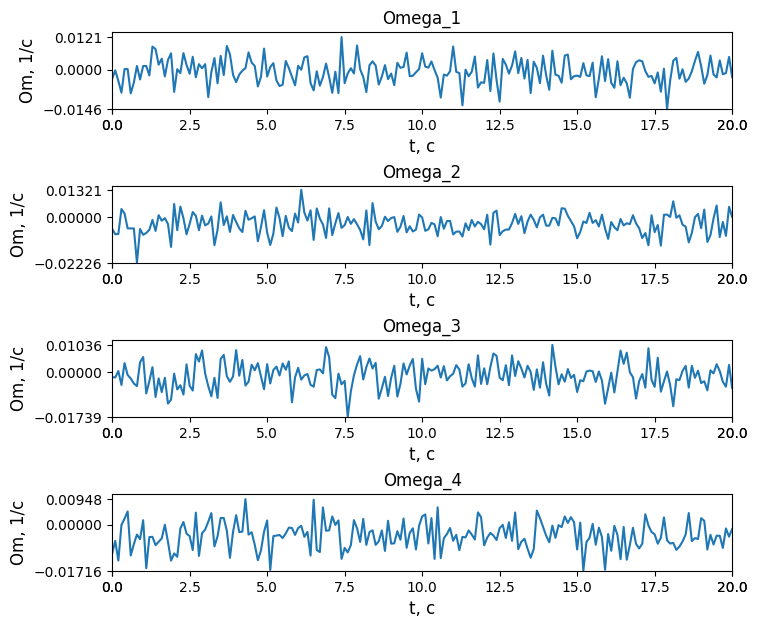

In [72]:
plot_om(arr_diff_real, max_padding=0.002)

Отклонение по координатам

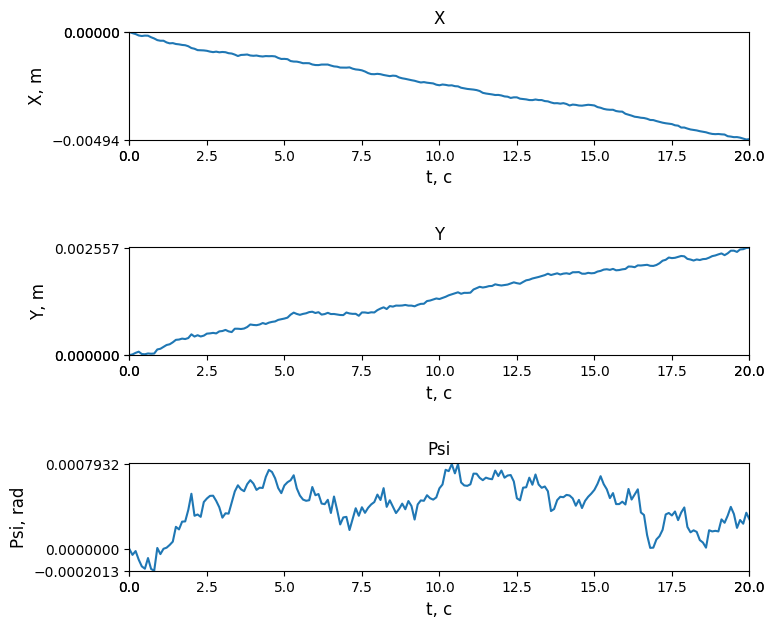

In [73]:
plot_x_y_psi(arr_diff_real, x_y_max_padding=0.00001, om_max_padding=0.00001)

Сравним траектории

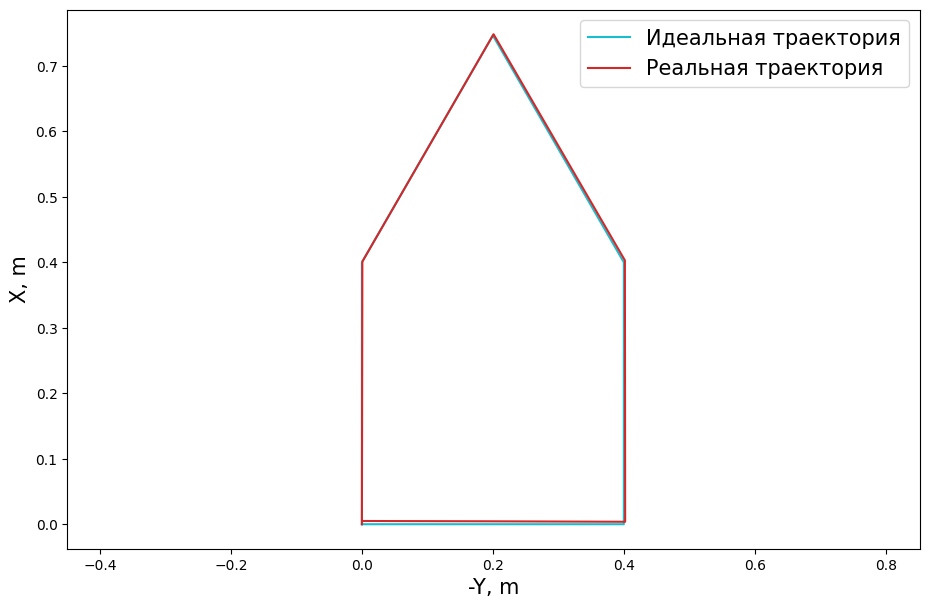

In [74]:
plt.figure(figsize=(11, 7))
plt.plot(-arr_ideal['Y'], arr_ideal['X'], label="Идеальная траектория", color="tab:cyan")
plt.plot(-arr_real['Y'], arr_real['X'], label="Реальная траектория", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

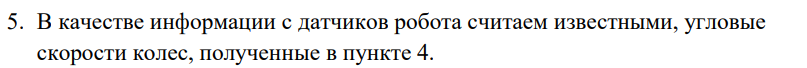

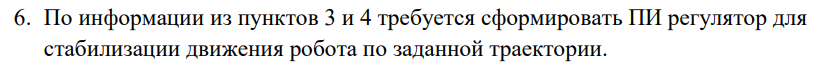

In [75]:
def pi_reg(omega_ideal, omega_vost, f_ideal, f_vost, KP, KI):
  P_error = omega_vost - omega_ideal
  I_error = f_vost - f_ideal
  sum_error = KP*P_error + KI*I_error
  return sum_error

In [76]:
def get_vost_omega(omega_ideal, omega_real, dt, KP=0.05, KI=10.0):
  f_ideal = 0
  f_vost = 0
  omega_vost_i = omega_real[0]
  omega_vost_list = []
  for i in range(n+1):
    omega_ideal_i = omega_ideal[i]
    omega_vost_list.append(omega_vost_i)
    f_ideal += omega_ideal_i * dt
    f_vost += omega_vost_i * dt
    sum_error = pi_reg(omega_ideal_i, omega_vost_i, f_ideal, f_vost, KP, KI)
    if i != n:
      omega_vost_i = omega_real[i+1] - sum_error
  return omega_vost_list

Смоделируем угловые скорости полученные с помощью ПИ-регулятора

In [77]:
KP = 0.05
KI = 10.0
arr_restored = arr_ideal[['t']].copy()
arr_restored['omega_1'] = get_vost_omega(arr_ideal['omega_1'], arr_real['omega_1'], dt, KP, KI)
arr_restored['omega_2'] = get_vost_omega(arr_ideal['omega_2'], arr_real['omega_2'], dt, KP, KI)
arr_restored['omega_3'] = get_vost_omega(arr_ideal['omega_3'], arr_real['omega_3'], dt, KP, KI)
arr_restored['omega_4'] = get_vost_omega(arr_ideal['omega_4'], arr_real['omega_4'], dt, KP, KI)
arr_restored

,t,omega_1,omega_2,omega_3,omega_4
0,0.0,1.003484,1.005804,1.002026,1.010778
1,0.1,0.996651,1.002321,1.000107,0.994750
2,0.2,1.004271,1.000028,0.997611,1.008118
3,0.3,1.003996,0.987957,1.005489,0.986079
4,0.4,0.991228,1.002803,0.991154,0.998748
...,...,...,...,...,...
196,19.6,0.994000,-0.984720,1.002964,-0.999583
197,19.7,1.005506,-1.008410,1.003758,-0.995667
198,19.8,0.998947,-0.992054,1.001859,-1.007467
199,19.9,0.994322,-1.014979,0.991699,-0.996349


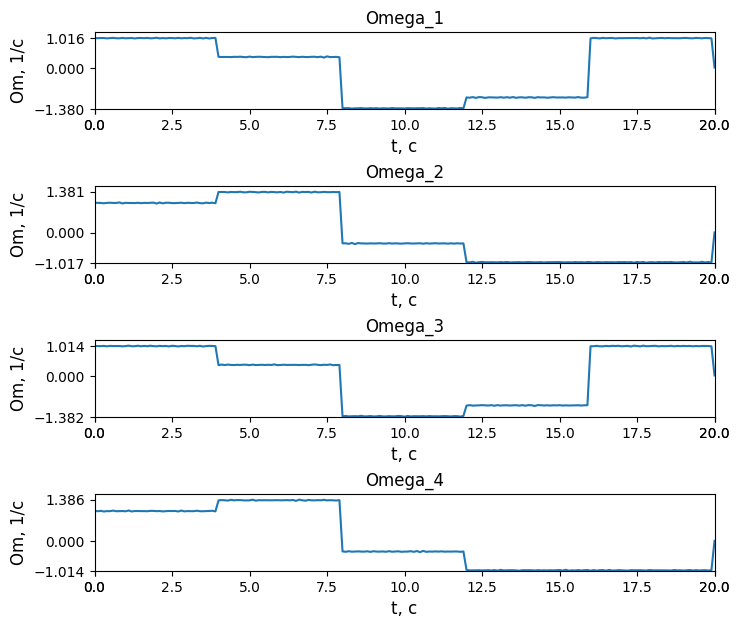

In [78]:
plot_om(arr_restored, max_padding=0.2)

Найдём скорости по omega

In [79]:
arr_restored = get_vx_vy_dpsi(arr_restored, l, h, R)
arr_restored

,t,omega_1,omega_2,omega_3,omega_4,dpsi,vL,vT
0,0.0,1.003484,1.005804,1.002026,1.010778,0.000536,0.100552,-0.000170
1,0.1,0.996651,1.002321,1.000107,0.994750,-0.000919,0.099846,-0.000192
2,0.2,1.004271,1.000028,0.997611,1.008118,0.001229,0.100251,0.000089
3,0.3,1.003996,0.987957,1.005489,0.986079,-0.000281,0.099588,0.000830
4,0.4,0.991228,1.002803,0.991154,0.998748,-0.000332,0.099598,-0.000546
...,...,...,...,...,...,...,...,...
196,19.6,0.994000,-0.984720,1.002964,-0.999583,-0.001986,0.000317,0.099135
197,19.7,1.005506,-1.008410,1.003758,-0.995667,0.001208,0.000130,0.100575
198,19.8,0.998947,-0.992054,1.001859,-1.007467,-0.001527,0.000032,0.099703
199,19.9,0.994322,-1.014979,0.991699,-0.996349,0.001771,-0.000633,0.100288


Найдём координаты

In [80]:
arr_restored['X'] = integral(arr_restored['vL'], dt)
arr_restored['Y'] = integral(arr_restored['vT'], dt)
arr_restored['psi'] = integral(arr_restored['dpsi'], dt)
arr_restored

,t,omega_1,omega_2,omega_3,omega_4,dpsi,vL,vT,X,Y,psi
0,0.0,1.003484,1.005804,1.002026,1.010778,0.000536,0.100552,-0.000170,0.000000,0.000000,0.000000
1,0.1,0.996651,1.002321,1.000107,0.994750,-0.000919,0.099846,-0.000192,0.010055,-0.000017,0.000054
2,0.2,1.004271,1.000028,0.997611,1.008118,0.001229,0.100251,0.000089,0.020040,-0.000036,-0.000038
3,0.3,1.003996,0.987957,1.005489,0.986079,-0.000281,0.099588,0.000830,0.030065,-0.000027,0.000085
4,0.4,0.991228,1.002803,0.991154,0.998748,-0.000332,0.099598,-0.000546,0.040024,0.000056,0.000057
...,...,...,...,...,...,...,...,...,...,...,...
196,19.6,0.994000,-0.984720,1.002964,-0.999583,-0.001986,0.000317,0.099135,-0.000004,-0.039973,0.000122
197,19.7,1.005506,-1.008410,1.003758,-0.995667,0.001208,0.000130,0.100575,0.000027,-0.030060,-0.000076
198,19.8,0.998947,-0.992054,1.001859,-1.007467,-0.001527,0.000032,0.099703,0.000040,-0.020002,0.000044
199,19.9,0.994322,-1.014979,0.991699,-0.996349,0.001771,-0.000633,0.100288,0.000044,-0.010032,-0.000108


Графики координат

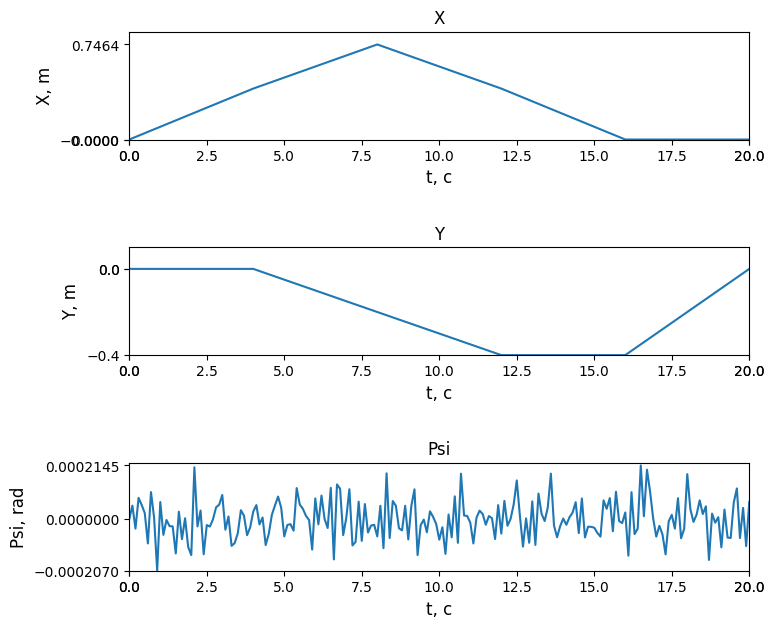

In [81]:
plot_x_y_psi(arr_restored, x_y_max_padding=0.1, om_max_padding=0.00001)

Восстановим траекторию по скоростям

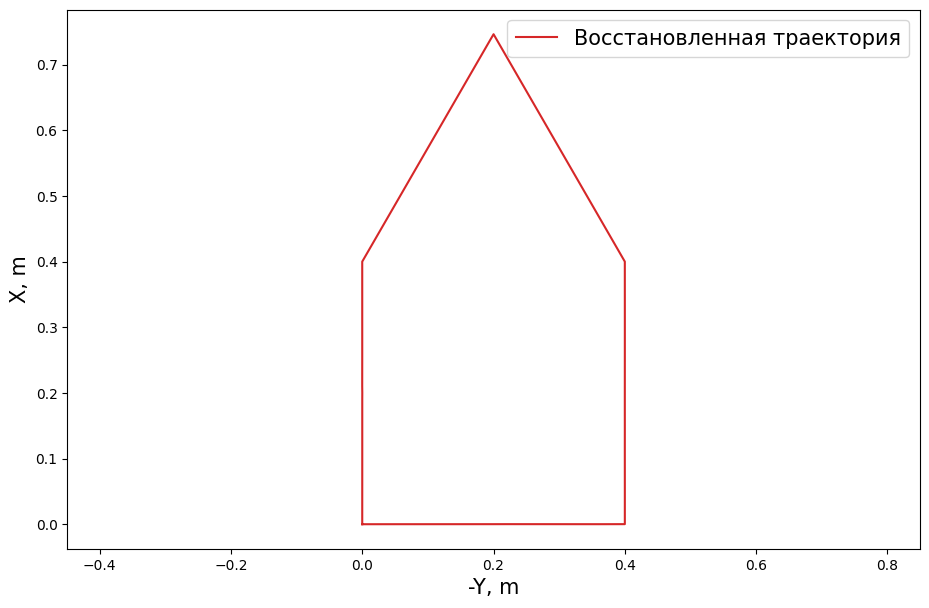

In [82]:
plt.figure(figsize=(11, 7))
plt.plot(-arr_restored['Y'], arr_restored['X'], label="Восстановленная траектория", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

Сравним отклонения восстановленных данных от идеальных с отклонениями реальных данных от идеальных

In [83]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'vL', 'vT', 'dpsi', 'X', 'Y', 'psi']
arr_diff_restored = arr_ideal[['t']].copy()
arr_diff_restored[columns_for_difference] = arr_ideal[columns_for_difference] - arr_restored[columns_for_difference]
arr_diff_restored

,t,omega_1,omega_2,omega_3,omega_4,vL,vT,dpsi,X,Y,psi
0,0.0,-0.003484,-0.005804,-0.002026,-0.010778,-0.000552,0.000170,-0.000536,0.000000,0.000000,0.000000
1,0.1,0.003349,-0.002321,-0.000107,0.005250,0.000154,0.000192,0.000919,-0.000055,0.000017,-0.000054
2,0.2,-0.004271,-0.000028,0.002389,-0.008118,-0.000251,-0.000089,-0.001229,-0.000040,0.000036,0.000038
3,0.3,-0.003996,0.012043,-0.005489,0.013921,0.000412,-0.000830,0.000281,-0.000065,0.000027,-0.000085
4,0.4,0.008772,-0.002803,0.008846,0.001252,0.000402,0.000546,0.000332,-0.000024,-0.000056,-0.000057
...,...,...,...,...,...,...,...,...,...,...,...
196,19.6,0.006000,-0.015280,-0.002964,-0.000417,-0.000317,0.000865,0.001986,0.000004,-0.000027,-0.000122
197,19.7,-0.005506,0.008410,-0.003758,-0.004333,-0.000130,-0.000575,-0.001208,-0.000027,0.000060,0.000076
198,19.8,0.001053,-0.007946,-0.001859,0.007467,-0.000032,0.000297,0.001527,-0.000040,0.000002,-0.000044
199,19.9,0.005678,0.014979,0.008301,-0.003651,0.000633,-0.000288,-0.001771,-0.000044,0.000032,0.000108


Отклонения по omega

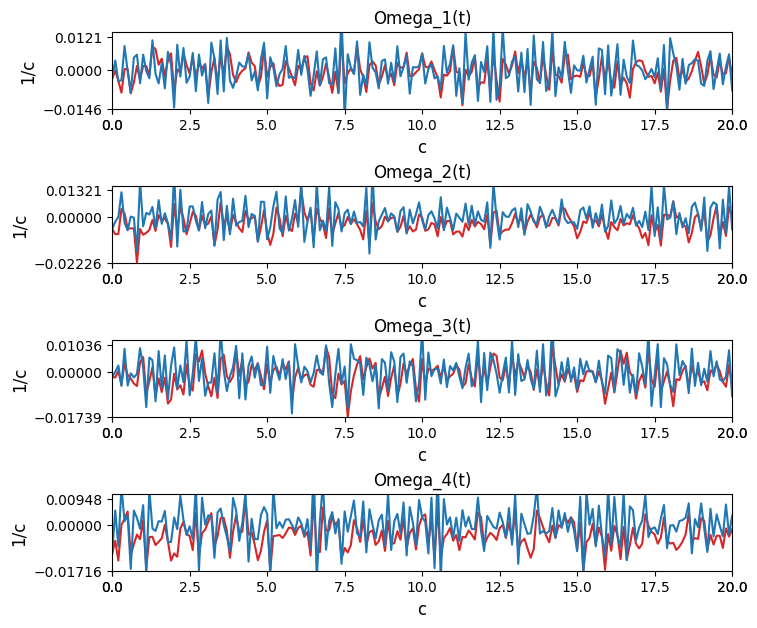

In [84]:
fig, ax = plt.subplots(nrows=4)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(arr_diff_real['t'], arr_diff_real['omega_1'], color="tab:red")
ax1.plot(arr_diff_restored['t'], arr_diff_restored['omega_1'], color="tab:blue")
ax1.set_title("Omega_1(t)")
ax1.set_xlabel("c", fontsize=12)
ax1.set_ylabel("1/c", fontsize=12)
ax1.set_yticks([0, min(arr_diff_real['omega_1']), max(arr_diff_real['omega_1'])])
ax1.set_xticks(list(ax1.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.002)
ax1.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

ax2.plot(arr_diff_real['t'], arr_diff_real['omega_2'], color="tab:red")
ax2.plot(arr_diff_restored['t'], arr_diff_restored['omega_2'], color="tab:blue")
ax2.set_title("Omega_2(t)")
ax2.set_xlabel("c", fontsize=12)
ax2.set_ylabel("1/c", fontsize=12)
ax2.set_yticks([0, min(arr_diff_real['omega_2']), max(arr_diff_real['omega_2'])])
ax2.set_xticks(list(ax2.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.002)
ax2.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

ax3.plot(arr_diff_real['t'], arr_diff_real['omega_3'], color="tab:red")
ax3.plot(arr_diff_restored['t'], arr_diff_restored['omega_3'], color="tab:blue")
ax3.set_title("Omega_3(t)")
ax3.set_xlabel("c", fontsize=12)
ax3.set_ylabel("1/c", fontsize=12)
ax3.set_yticks([0, min(arr_diff_real['omega_3']), max(arr_diff_real['omega_3'])])
ax3.set_xticks(list(ax3.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.002)
ax3.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

ax4.plot(arr_diff_real['t'], arr_diff_real['omega_4'], color="tab:red")
ax4.plot(arr_diff_restored['t'], arr_diff_restored['omega_4'], color="tab:blue")
ax4.set_title("Omega_4(t)")
ax4.set_xlabel("c", fontsize=12)
ax4.set_ylabel("1/c", fontsize=12)
ax4.set_yticks([0, min(arr_diff_real['omega_4']), max(arr_diff_real['omega_4'])])
ax4.set_xticks(list(ax4.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+0.002)
ax4.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

fig.set_size_inches(8, 7)
plt.subplots_adjust(hspace=1)

Отклонения по координатам

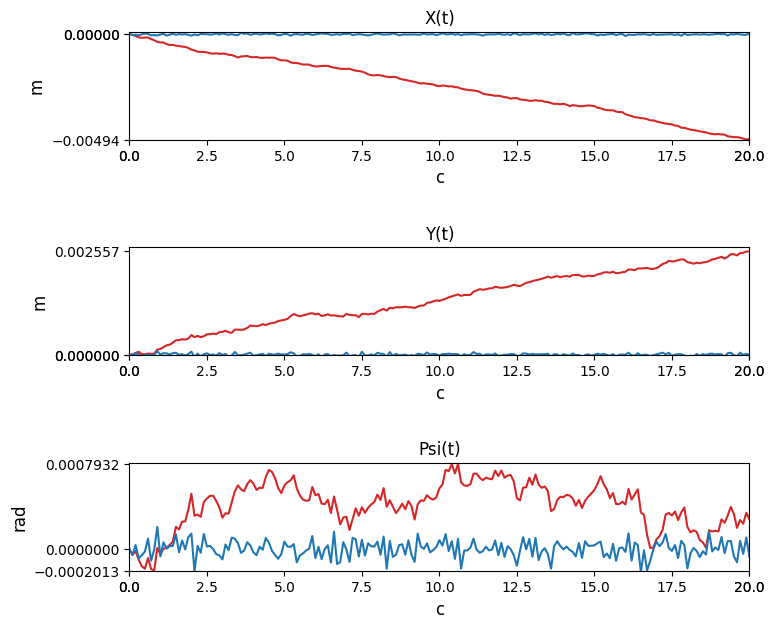

In [85]:
fig, ax = plt.subplots(nrows=3)
ax1, ax2, ax3 = ax.flatten()

ax1.plot(arr_diff_real['t'], arr_diff_real['X'], color="tab:red")
ax1.plot(arr_diff_restored['t'], arr_diff_restored['X'], color="tab:blue")
ax1.set_title("X(t)")
ax1.set_xlabel("c", fontsize=12)
ax1.set_ylabel("m", fontsize=12)
ax1.set_yticks([0, min(arr_diff_real['X']), max(arr_diff_real['X'])])
ax1.set_xticks(list(ax1.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.0001)
ax1.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

ax2.plot(arr_diff_real['t'], arr_diff_real['Y'], color="tab:red")
ax2.plot(arr_diff_restored['t'], arr_diff_restored['Y'], color="tab:blue")
ax2.set_title("Y(t)")
ax2.set_xlabel("c", fontsize=12)
ax2.set_ylabel("m", fontsize=12)
ax2.set_yticks([0, min(arr_diff_real['Y']), max(arr_diff_real['Y'])])
ax2.set_xticks(list(ax2.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.0001)
ax2.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

ax3.plot(arr_diff_real['t'], arr_diff_real['psi'], color="tab:red")
ax3.plot(arr_diff_restored['t'], arr_diff_restored['psi'], color="tab:blue")
ax3.set_title("Psi(t)")
ax3.set_xlabel("c", fontsize=12)
ax3.set_ylabel("rad", fontsize=12)
ax3.set_yticks([0, min(arr_diff_real['psi']), max(arr_diff_real['psi'])])
ax3.set_xticks(list(ax3.get_xticks()) + [min(arr_diff_real['t']), max(arr_diff_real['t'])])
ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.00001)
ax3.set_xlim(min(arr_diff_real['t']), max(arr_diff_real['t']))

fig.set_size_inches(8, 7)
plt.subplots_adjust(hspace=1)

Сравним траектории

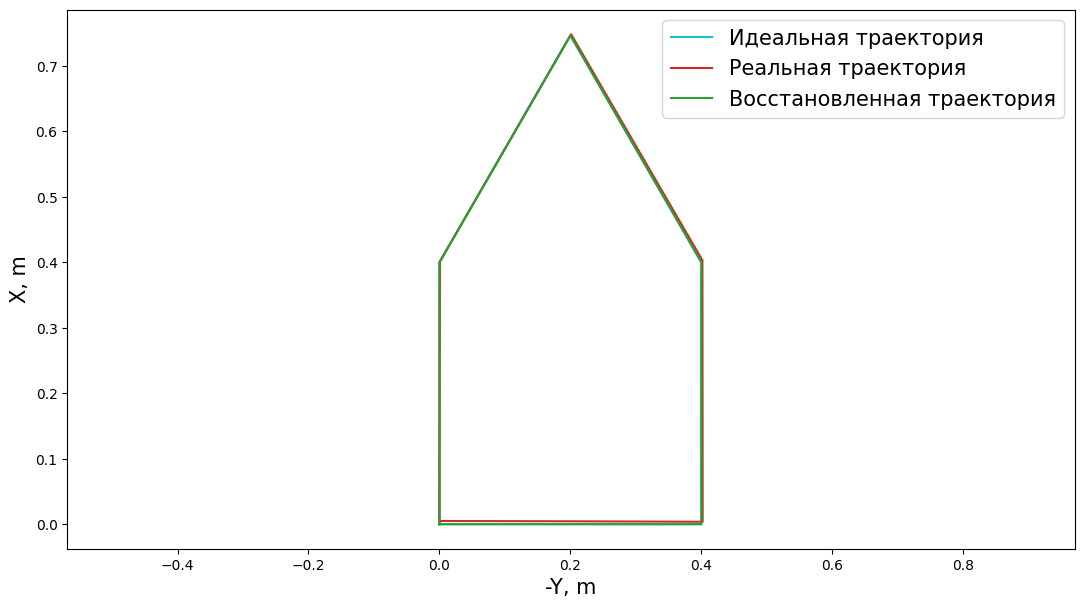

In [86]:
plt.figure(figsize=(13, 7))
plt.plot(-arr_ideal['Y'], arr_ideal['X'], label="Идеальная траектория", color="tab:cyan")
plt.plot(-arr_real['Y'], arr_real['X'], label="Реальная траектория", color="tab:red")
plt.plot(-arr_restored['Y'], arr_restored['X'], label="Восстановленная траектория", color="tab:green")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

### Найдём СКО и мат. ожидание для разниц координат

In [87]:
def math_e(series):
  return series.sum()/len(series)

In [88]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [89]:
def get_table_Math_SKO(ddf_ir, ddf_iv):
  math_sko = pd.DataFrame({ 
     'omega_1': [math_e(ddf_ir['omega_1']),
           s_dev(ddf_ir['omega_1'], math_e(ddf_ir['omega_1'])),
           math_e(ddf_iv['omega_1']),
           s_dev(ddf_iv['omega_1'], math_e(ddf_iv['omega_1']))], 
     'omega_2': [math_e(ddf_ir['omega_2']),
           s_dev(ddf_ir['omega_2'], math_e(ddf_ir['omega_2'])),
           math_e(ddf_iv['omega_2']),
           s_dev(ddf_iv['omega_2'], math_e(ddf_iv['omega_2']))],
     'omega_3': [math_e(ddf_ir['omega_3']),
           s_dev(ddf_ir['omega_3'], math_e(ddf_ir['omega_3'])),
           math_e(ddf_iv['omega_3']),
           s_dev(ddf_iv['omega_3'], math_e(ddf_iv['omega_3']))], 
     'omega_4': [math_e(ddf_ir['omega_4']),
           s_dev(ddf_ir['omega_4'], math_e(ddf_ir['omega_4'])),
           math_e(ddf_iv['omega_4']),
           s_dev(ddf_iv['omega_4'], math_e(ddf_iv['omega_4']))], 
     'vL': [math_e(ddf_ir['vL']),
           s_dev(ddf_ir['vL'], math_e(ddf_ir['vL'])),
           math_e(ddf_iv['vL']),
           s_dev(ddf_iv['vL'], math_e(ddf_iv['vL']))],
     'vT': [math_e(ddf_ir['vT']),
           s_dev(ddf_ir['vT'], math_e(ddf_ir['vT'])),
           math_e(ddf_iv['vT']),
           s_dev(ddf_iv['vT'], math_e(ddf_iv['vT']))],
     'dpsi': [math_e(ddf_ir['dpsi']),
           s_dev(ddf_ir['dpsi'], math_e(ddf_ir['dpsi'])),
           math_e(ddf_iv['dpsi']),
           s_dev(ddf_iv['dpsi'], math_e(ddf_iv['dpsi']))],
     'X': [math_e(ddf_ir['X']),
           s_dev(ddf_ir['X'], math_e(ddf_ir['X'])),
           math_e(ddf_iv['X']),
           s_dev(ddf_iv['X'], math_e(ddf_iv['X']))], 
     'Y': [math_e(ddf_ir['Y']),
           s_dev(ddf_ir['Y'], math_e(ddf_ir['Y'])),
           math_e(ddf_iv['Y']),
           s_dev(ddf_iv['Y'], math_e(ddf_iv['Y']))], 
     'Psi': [math_e(ddf_ir['psi']),
           s_dev(ddf_ir['psi'], math_e(ddf_ir['psi'])),
           math_e(ddf_iv['psi']),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return math_sko

In [90]:
math_sko = get_table_Math_SKO(arr_diff_real, arr_diff_restored)
math_sko

,omega_1,omega_2,omega_3,omega_4,vL,vT,dpsi,X,Y,Psi
Math_ir,-0.000806,-0.003364,-0.001646,-0.004028,-0.000246,1.264241e-04,0.000015,-0.002445,0.001375,0.000411
SKO_ir,0.004634,0.004951,0.004942,0.005063,0.000265,2.822300e-04,0.000773,0.001355,0.000704,0.000213
Math_iv,-0.000015,-0.000004,-0.000034,-0.000007,-0.000002,-6.990371e-07,0.000001,-0.000024,0.000013,0.000001
SKO_iv,0.006912,0.007427,0.006938,0.007629,0.000374,4.297589e-04,0.001212,0.000026,0.000028,0.000078


Во сколько раз улучшилась точность с ПИ-регулятором

In [91]:
pd.DataFrame(abs(math_sko[['X', 'Y', 'Psi']].values[0:2]) / abs(math_sko[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,99.956032,108.167687,303.030955
SKO,51.257350,24.845724,2.719560
